In [21]:
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.python.summary import summary_iterator
import os

workspace_path = Path(os.getcwd()).parent.parent.parent

print(workspace_path)

def extract_scalars_from_event_file(event_file):
    scalars = {}
    for event in summary_iterator.summary_iterator(event_file):
        for value in event.summary.value:
            if value.HasField('simple_value'):
                if value.tag not in scalars:
                    scalars[value.tag] = []
                scalars[value.tag].append(value.simple_value)
    return scalars



fold_metrics = {}

for event_file_path in Path(f'{workspace_path}/models/detection/tfevent_train/summit/test_balanced').glob('events.out.tfevents.*'):

    fold = event_file_path.parts[-2]

    event_file = event_file_path.as_posix()

    print(f'Processing {event_file}')
    fold_metrics[fold] = pd.DataFrame.from_dict(extract_scalars_from_event_file(event_file), orient='index').T



/Users/john/Projects/SOTAEvaluationNoduleDetection
Processing /Users/john/Projects/SOTAEvaluationNoduleDetection/models/detection/tfevent_train/summit/test_balanced/events.out.tfevents.1715266807.swedishchef.local.29989.0


In [22]:
fold_metrics

{'test_balanced':        train_loss  avg_train_loss  avg_train_cls_loss  avg_train_box_reg_loss  \
 0        1.607422        0.665165            0.521761                0.143403   
 1        1.541016        0.626723            0.494355                0.132373   
 2        1.224609        0.606868            0.488551                0.118313   
 3        1.521484        0.547833            0.445441                0.102389   
 4        1.336914        0.451726            0.360151                0.091579   
 ...           ...             ...                 ...                     ...   
 80600    0.160645             NaN                 NaN                     NaN   
 80601    0.238281             NaN                 NaN                     NaN   
 80602    0.265381             NaN                 NaN                     NaN   
 80603    0.245361             NaN                 NaN                     NaN   
 80604    0.152832             NaN                 NaN                     NaN   

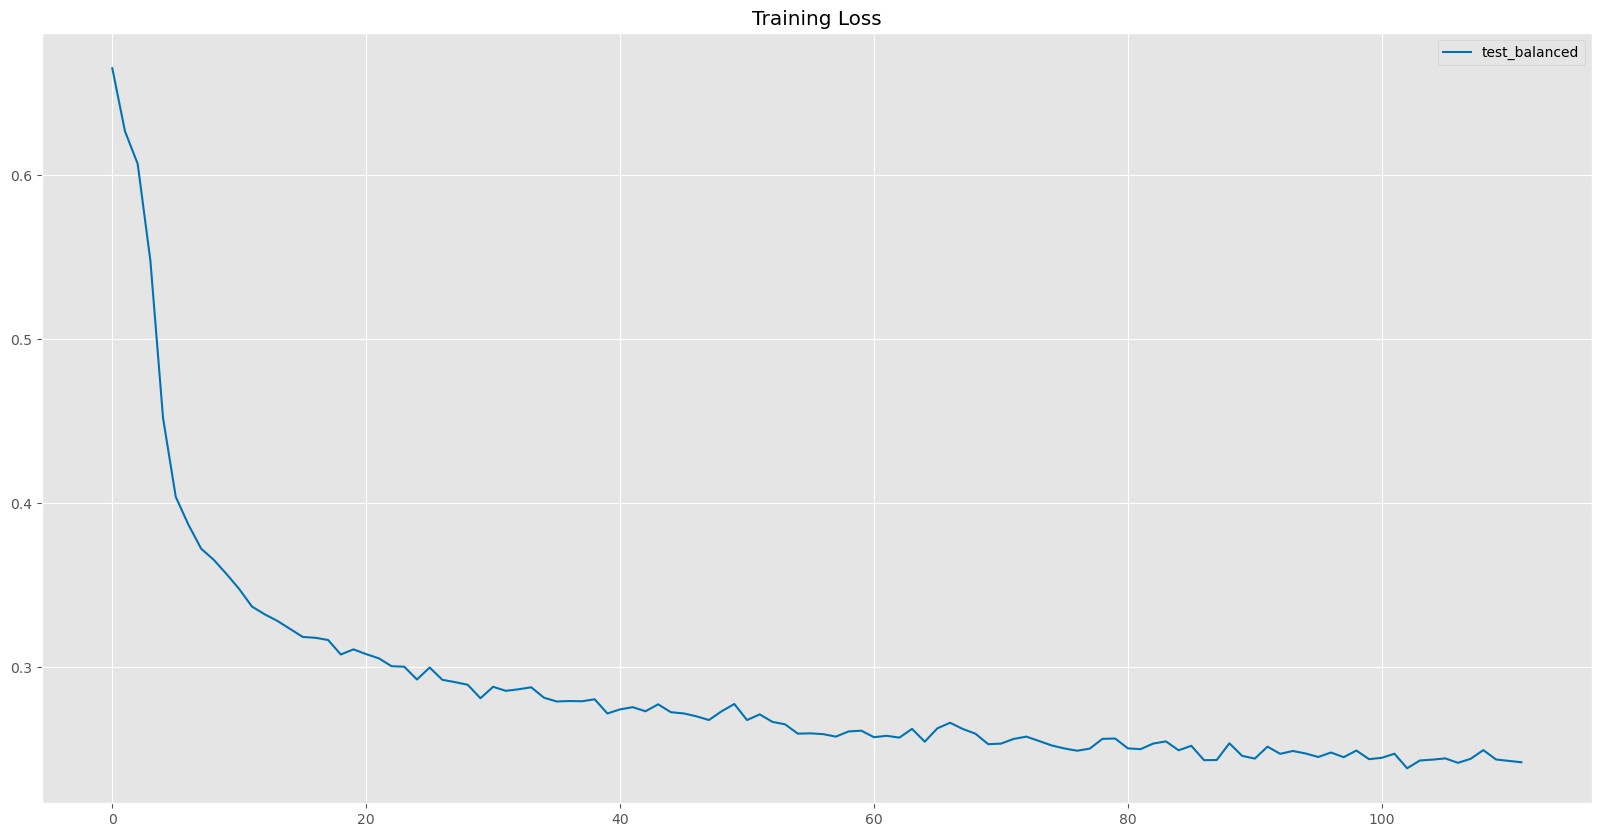

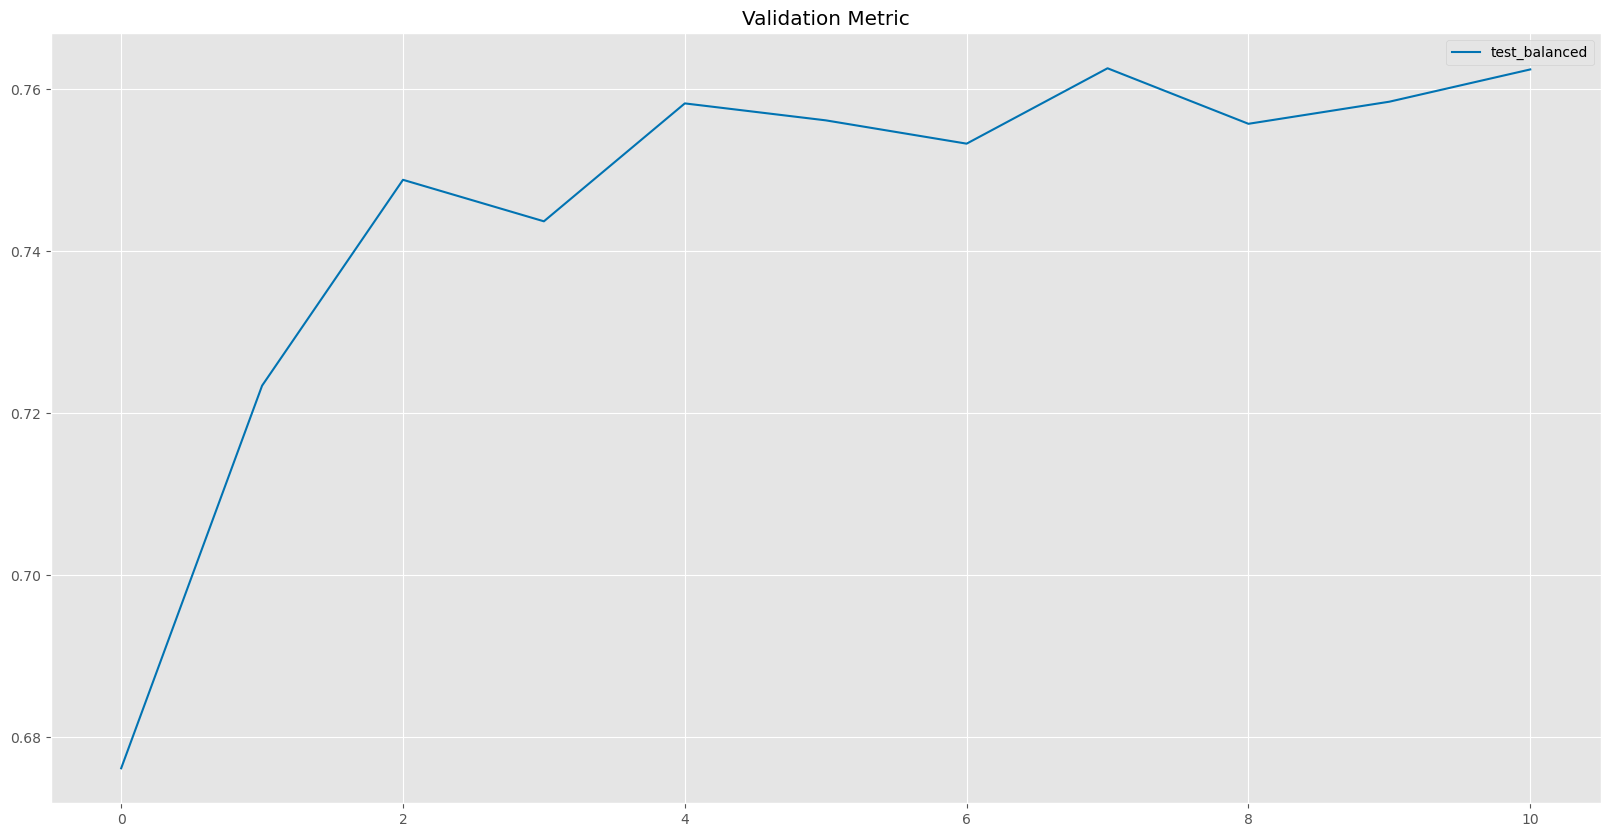

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_training_data(fold_metrics):


    # Generate a colorblind-friendly palette with 5 colors
    color_palette = sns.color_palette("colorblind", 5)

    fig, ax = plt.subplots(1, 1, figsize=(20, 10))    
    for idx, (fold, data) in enumerate(fold_metrics.items()):

        ax.plot(data['avg_train_loss'], label=fold, color=color_palette[idx])
        ax.set_title('Training Loss')
        ax.legend()

    plt.show()


    
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    for idx, (fold, data) in enumerate(fold_metrics.items()):
        ax.plot(data['val_metric'], label=fold, color=color_palette[idx])
        ax.set_title('Validation Metric')
        ax.legend()
    
    plt.style.use('ggplot')
    plt.show()

    
plot_training_data(fold_metrics)
# d = [fold_metrics['luna_fold1']['val_metric'].values, fold_metrics['luna_fold2']['val_metric'].values, fold_metrics['luna_fold3']['val_metric'].values, fold_metrics['luna_fold4']['val_metric'].values, fold_metrics['luna_fold5']['val_metric'].values]
# d = pd.DataFrame(d).T.rename(columns={0:'fold1',1:'fold2',2:'fold3',3:'fold4',4:'fold5'})